In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
wine = pd.read_csv("C:\\Users\\Varnika Mulay\\Downloads\\wine_combined.csv")

In [3]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,white,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,white,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,white,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,white,6
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,white,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,red,5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,red,6
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,red,6
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,red,5


In [4]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,white,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,white,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,white,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,white,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,white,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,white,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,white,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,white,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,white,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,white,6


In [5]:
wine.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
6487,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,red,5
6488,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,red,6
6489,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,red,6
6490,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,red,6
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,red,6
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,red,5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,red,6
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,red,6
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,red,5
6496,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,red,6


In [6]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  type                  6497 non-null   object 
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [8]:
wine.shape

(6497, 13)

In [9]:
wine.size

84461

In [10]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
quality                 0
dtype: int64

In [11]:
wine.quality.unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [12]:
wine.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.853333,0.517000,0.281000,5.140000,0.077033,39.216667,122.033333,0.995744,3.257667,0.506333,10.215000
4,7.288889,0.457963,0.272315,4.153704,0.060056,20.636574,103.432870,0.994833,3.231620,0.505648,10.180093
5,7.326801,0.389614,0.307722,5.804116,0.064666,30.237371,120.839102,0.995849,3.212189,0.526403,9.837783
6,7.177257,0.313863,0.323583,5.549753,0.054157,31.165021,115.410790,0.994558,3.217726,0.532549,10.587553
7,7.128962,0.288800,0.334764,4.731696,0.045272,30.422150,108.498610,0.993126,3.228072,0.547025,11.386006
8,6.835233,0.291010,0.332539,5.382902,0.041124,34.533679,117.518135,0.992514,3.223212,0.512487,11.678756
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


In [13]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type', 'quality'],
      dtype='object')

In [14]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


In [15]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.ensemble import RandomForestClassifier

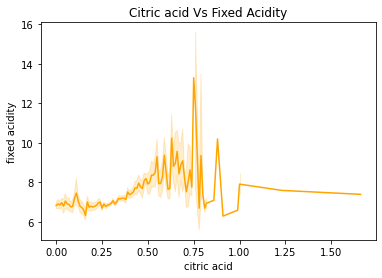

In [16]:
sns.lineplot(x = 'citric acid', y = 'fixed acidity', data = wine, color = 'orange')
pl.title("Citric acid Vs Fixed Acidity")
pl.show()

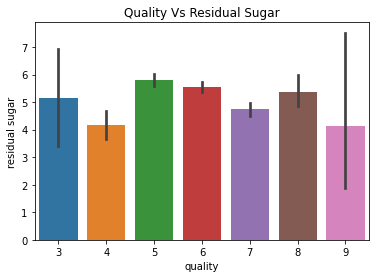

In [81]:
sns.barplot(x= 'quality', y = 'residual sugar', data = wine)
pl.title("Quality Vs Residual Sugar")
pl.show()

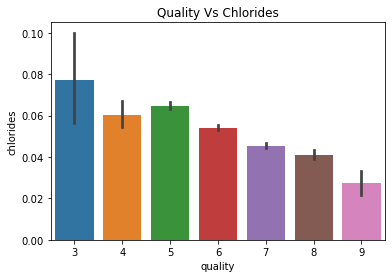

In [18]:
sns.barplot(x= 'quality', y = 'chlorides', data = wine)
pl.title("Quality Vs Chlorides")
pl.show()

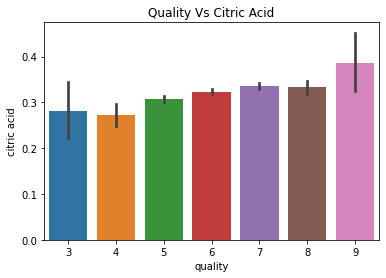

In [19]:
sns.barplot(x= 'quality', y = 'citric acid', data = wine)
pl.title("Quality Vs Citric Acid")
pl.show()

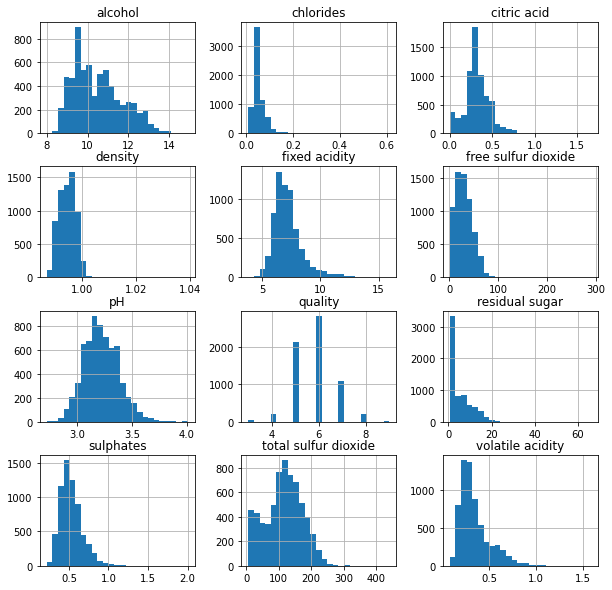

In [20]:
wine.hist(bins=25,figsize=(10,10))
# display histogram
pl.show()

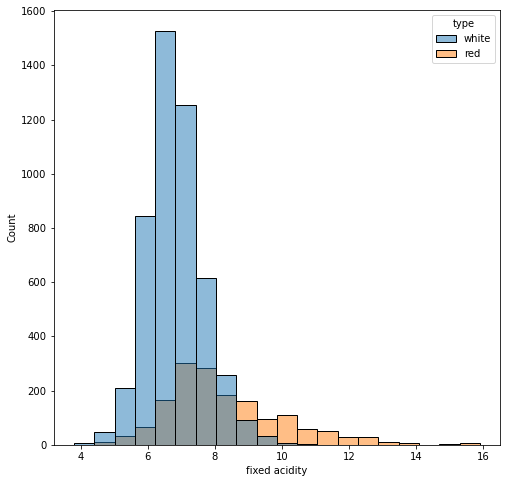

In [21]:
pl.figure(figsize = (8,8))
sns.histplot(data=wine, x="fixed acidity", hue="type",bins=20)
pl.show()

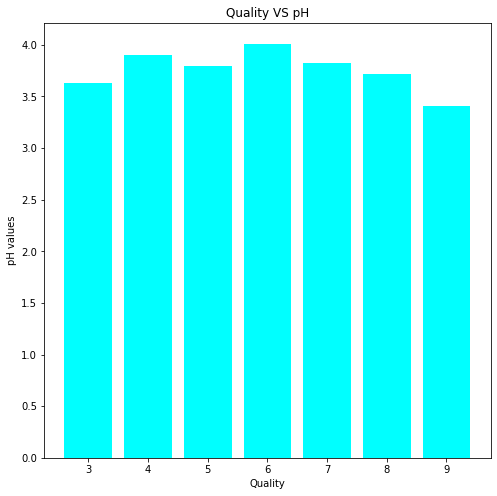

In [22]:
pl.figure(figsize = (8,8))
pl.bar(wine['quality'], wine['pH'], color = 'cyan')
pl.xlabel("Quality")
pl.ylabel("pH values")
pl.title("Quality VS pH")
pl.show()

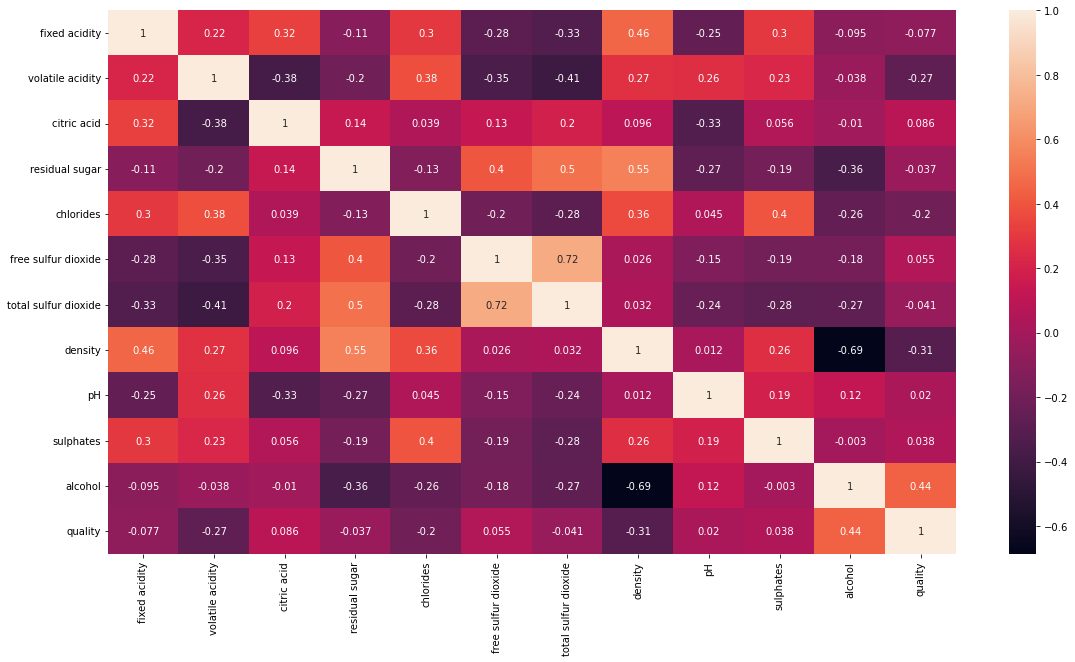

In [23]:
#Correlation
pl.figure(figsize=[19,10])
sns.heatmap(wine.corr(),annot=True)

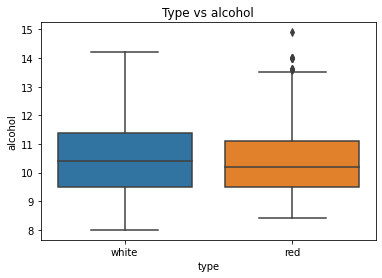

In [24]:
#boxplot
sns.boxplot(y = wine['alcohol'], x=wine['type'])
pl.title("Type vs alcohol")
pl.show()

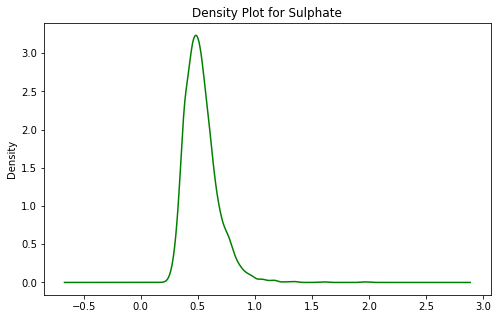

In [25]:
#Density plot
pl.figure(figsize = (8,5))
wine.sulphates.plot.density(color='green')
pl.title('Density Plot for Sulphate')
pl.show()

In [26]:
for a in range(len(wine.corr().columns)):
    for b in range(a):
        if abs(wine.corr().iloc[a,b]) > 0.7:
            name = wine.corr().columns[a]
            print(name)

total sulfur dioxide


In [37]:
wine.replace({'white': 1, 'red': 0}, inplace=True)

In [38]:
X1 = wine.drop('quality',axis=1)

In [39]:
X1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [40]:
Y1 = wine['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [41]:
Y1

0       0
1       0
2       0
3       0
4       0
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: quality, Length: 6497, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.3, random_state=3)

In [43]:
print(Y.shape, Y_train.shape, Y_test.shape)

(6497,) (4547,) (1950,)


In [76]:
#LogisticRegression:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("Classification report:\n")
print(classification_report(Y_pred, Y_test))
print("\n")
print("Accuracy Score:",accuracy_score(Y_pred, Y_test))

Classification report:

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1796
           1       0.23      0.58      0.33       154

    accuracy                           0.81      1950
   macro avg       0.59      0.71      0.61      1950
weighted avg       0.90      0.81      0.85      1950



Accuracy Score: 0.8107692307692308


C:\Users\Varnika Mulay\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
#Using KNN:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("Classification report:\n")
print(classification_report(y_pred, Y_test))
print("\n")
print("Accuracy Score:",accuracy_score(y_pred, Y_test))

Classification report:

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1594
           1       0.43      0.47      0.45       356

    accuracy                           0.79      1950
   macro avg       0.65      0.66      0.66      1950
weighted avg       0.80      0.79      0.79      1950



Accuracy Score: 0.7871794871794872


In [67]:
#Using SVC:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,Y_train)
pred_y = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("Classification report:\n")
print(classification_report(Y_test, pred_y))
print("\n")
print("Accuracy Score:",accuracy_score(Y_test,pred_y))

Classification report:

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1555
           1       0.00      0.00      0.00       395

    accuracy                           0.80      1950
   macro avg       0.40      0.50      0.44      1950
weighted avg       0.64      0.80      0.71      1950



Accuracy Score: 0.7974358974358975


C:\Users\Varnika Mulay\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
#Using Decision Tree:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=7)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("Classification report:\n")
print(classification_report(Y_test, y_pred))
print("\n")
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Classification report:

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1555
           1       0.58      0.64      0.60       395

    accuracy                           0.83      1950
   macro avg       0.74      0.76      0.75      1950
weighted avg       0.84      0.83      0.83      1950



Accuracy Score: 0.8317948717948718


In [69]:
#Using GaussianNB:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train,Y_train)
y_pred3 = model3.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("Classification report:\n")
print(classification_report(Y_test, y_pred3))
print("\n")
print("Accuracy Score:",accuracy_score(Y_test,y_pred3))

Classification report:

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1555
           1       0.41      0.66      0.50       395

    accuracy                           0.74      1950
   macro avg       0.65      0.71      0.66      1950
weighted avg       0.80      0.74      0.76      1950



Accuracy Score: 0.735897435897436


In [70]:
#Using Xgboost:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(X_train, Y_train)
y_pred5 = model5.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("Classification report:\n")
print(classification_report(Y_test, y_pred5))
print("\n")
print("Accuracy Score:",accuracy_score(Y_test,y_pred5))

Classification report:

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1555
           1       0.71      0.58      0.64       395

    accuracy                           0.87      1950
   macro avg       0.80      0.76      0.78      1950
weighted avg       0.86      0.87      0.86      1950



Accuracy Score: 0.8656410256410256


In [72]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, Y_train)
X_test_prediction = model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
print("Classification report:\n")
print(classification_report(X_test_prediction, Y_test))
print("\n")
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy : ', test_data_accuracy)

Classification report:

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1669
           1       0.54      0.75      0.63       281

    accuracy                           0.87      1950
   macro avg       0.75      0.82      0.77      1950
weighted avg       0.90      0.87      0.88      1950



Accuracy :  0.8707692307692307


In [75]:
accuracy_result = pd.DataFrame({
    'Model': ['Logistic Regression','KNN', 'SVC','Decision Tree' ,'GaussianNB','Random Forest','Xgboost'],
    'Score': [0.8107,0.7871,0.7974,0.8317,0.7358,0.8707,0.8656]})

data = accuracy_result.sort_values(by='Score', ascending=False)
data = data.set_index('Score')
data

,Model
Score,
0.8707,Random Forest
0.8656,Xgboost
0.8317,Decision Tree
0.8107,Logistic Regression
0.7974,SVC
0.7871,KNN
0.7358,GaussianNB


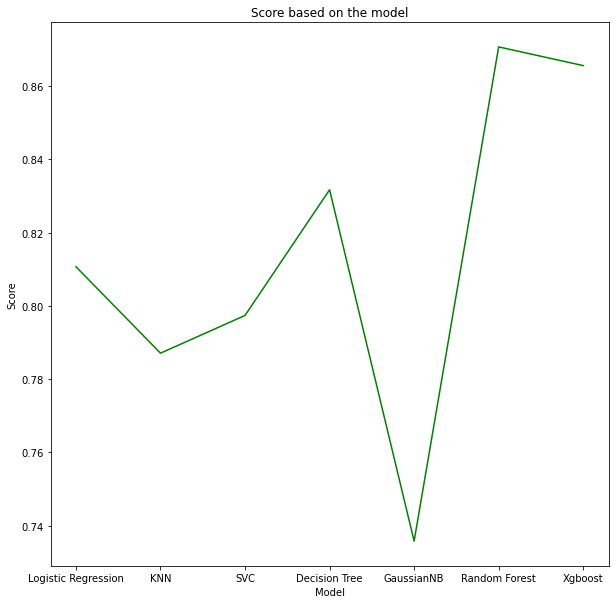

In [78]:
pl.figure(figsize = (10,10))
sns.lineplot(x = 'Model', y = 'Score', data = accuracy_result, color='green')
pl.title("Score based on the model")
pl.show()

In [85]:
wine.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
quality,,,,,,,,,,,,
3,7.853333,0.517000,0.281000,5.140000,0.077033,39.216667,122.033333,0.995744,3.257667,0.506333,10.215000,0.666667
4,7.288889,0.457963,0.272315,4.153704,0.060056,20.636574,103.432870,0.994833,3.231620,0.505648,10.180093,0.754630
5,7.326801,0.389614,0.307722,5.804116,0.064666,30.237371,120.839102,0.995849,3.212189,0.526403,9.837783,0.681478
6,7.177257,0.313863,0.323583,5.549753,0.054157,31.165021,115.410790,0.994558,3.217726,0.532549,10.587553,0.775035
7,7.128962,0.288800,0.334764,4.731696,0.045272,30.422150,108.498610,0.993126,3.228072,0.547025,11.386006,0.815570
8,6.835233,0.291010,0.332539,5.382902,0.041124,34.533679,117.518135,0.992514,3.223212,0.512487,11.678756,0.906736
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000,1.000000


In [93]:
#Building a Predictive System for input at row 9
input_data = (7.42,0.298,0.386,4.12,0.0274,33.0,116, 0.991460,3.308,0.466,12.18, 0)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)
if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[1]
Good Quality Wine


In [98]:
#Building a Predictive System for input at row 9
input_data = (7.853,0.517,0.281,5.14,0.077033,39.216,122.03, 0.995744,3.257,0.50633,10.215,0)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model5.predict(input_data_reshaped)
print(prediction)
if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine
